# Classifying Images of Clothing Using TensorFlow


Train a Deep Learning model to classify images of clothing using Convolutional Neural Networks in TensorFlow.

![Picture title](image-20220807-205224.png)

In [ ]:
# importing the libraries
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

### Import the Fashion MNIST dataset

the MNIST fasion dataset conatins 70,000 grayscale image of 10 classes. Which reprsent individual clothing items with 28*28 pixels of resolution. Each value is in the range [0,255] which defines the color and intensity of each pixel. We'll be using 60,000 fir training and 10,000 for testing in order to classify images

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

![Picture title](image-20220807-192604.png)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


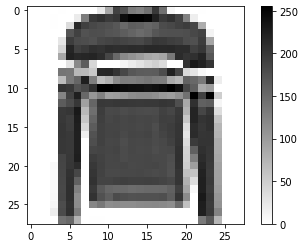

In [ ]:
plt.figure()
plt.imshow(train_images[5],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

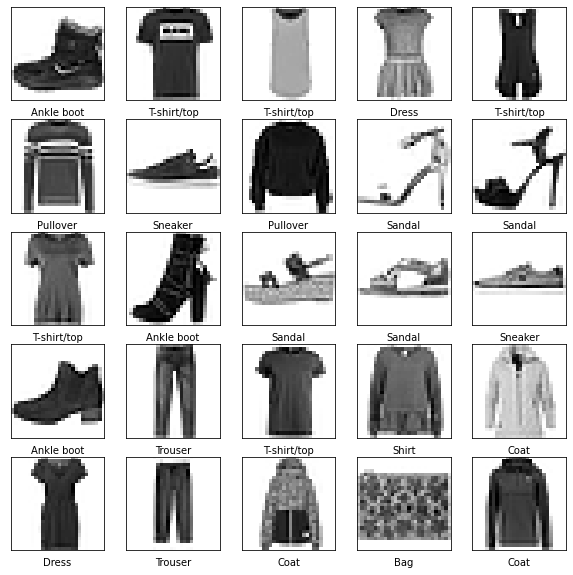

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Preprocess the data

* <b>Normalizing</b>
we'll start by viewing an example of the data and normalizing between [0,1]the values since they are in the range of [0,255] 

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

* <b>Reshaping the Image</b>
The Convolutional Neural Network expects 4 dimensions as input: number of samples (60,000), pixels (28 x 28), and color channel. Since we are working with greyscale images there is only a single channel. However, as we have seen before, the shape of our X_train dataset is (6000, 28, 28) and we need (6000, 28, 28, 1) as input. Thus, we need to reshape our datasets.

In [ ]:
# redimensionar as imagens
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

print("train_images: ", train_images.shape)
print("test_images:  ", test_images.shape)

train_images:  (60000, 28, 28, 1)
test_images:   (10000, 28, 28, 1)


* <b>One-Hot Encoding</b>
Our class data has labels in the range [0, 9], which is called Integer Encoding. However, there is no ordinal relationship between the labels and the corresponding class. In this case, using the integer encoding allows the model to assume a natural ordering between categories, which may result in poor performance or unexpected results from the Deep Learning model. To solve this problem, we can use a one-hot encode, which creates a new binary variable for each unique integer value.

In [ ]:
train_labels = keras.utils.to_categorical(train_labels,10)
test_labels = keras.utils.to_categorical(test_labels,10)

In [ ]:
print("First Label Before One-Hot Encoding: ", train_labels[0])

First Label Before One-Hot Encoding:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Building the model

For this project, we are going to use a typical CNN architecture represented in the image below.

![Picture title](image-20220807-193700.png)

As we have in the image, we will include a convolutional and a pooling layers, then another convolutional and pooling layers. Then, we are going to add a flatten layer to transform our 2d-array image in a 1d-array and add some dense layers. We can add some dropout layers to reduce overfitting. For the last layer, we add a dense layer with the number of classes from our problem (10) and a softmax activation, which creates the probability distribution for each class.

In [ ]:
model= keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

2022-08-07 19:15:23.876038: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-08-07 19:15:23.876091: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-db20e7c1-e3b3-4d56-a059-17e8ce061c91): /proc/driver/nvidia/version does not exist
2022-08-07 19:15:23.876473: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:
Here we need to pass the input data, the target data and the number of epochs, which defines the number of full iterations of the training dataset. We will also pass a parameter to split our data in training (70%) and validation (30%) and a parameter to define the batch_size, which is the number of training examples in each pass.
 
ps: We will save the results of our training in the variable model_history.

In [ ]:
model_history = model.fit(train_images, train_labels,  batch_size=50, epochs=10, validation_split=0.3)

2022-08-07 19:15:24.062332: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.
Epoch 1/10
840/840 [==============================] - 105s 125ms/step - loss: 0.5641 - accuracy: 0.8010 - val_loss: 0.3295 - val_accuracy: 0.8796
Epoch 2/10
840/840 [==============================] - 100s 119ms/step - loss: 0.3399 - accuracy: 0.8796 - val_loss: 0.2788 - val_accuracy: 0.8972
Epoch 3/10
840/840 [==============================] - 110s 131ms/step - loss: 0.2895 - accuracy: 0.8966 - val_loss: 0.2656 - val_accuracy: 0.9015
Epoch 4/10
840/840 [==============================] - 101s 120ms/step - loss: 0.2510 - accuracy: 0.9094 - val_loss: 0.2421 - val_accuracy: 0.9112
Epoch 5/10
840/840 [==============================] - 100s 119ms/step - loss: 0.2260 - accuracy: 0.9173 - val_loss: 0.2284 - val_accuracy: 0.9174
Epoch 6/10
840/840 [==============================] - 109s 130ms/step - loss: 0.2044 - accuracy: 0.9252 - val_loss: 0.2263 - val_

This model reaches an accuracy of about 0.95 (or 95%) on the training data.

### Evaluating the model

* <b> Loss </b>
The fit method returns a history object with the results for each epoch. We can plot a chart with the loss and accuracy for the training and validation datasets. From this chart, it is possible to see how the loss goes down and the accuracy goes up over the epochs. This chart is also used to identify evidence of overfitting and underfitting. For our model, it doesn't seem we have strong evidence of these problems. Thus, let's move on and make some predictions with our test dataset.

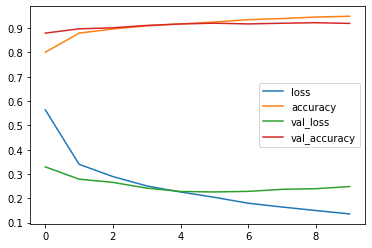

In [ ]:
pd.DataFrame(model_history.history).plot()
plt.show()

* <b> Accruracy </b>
the performance on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-08-07 19:33:47.804032: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
313/313 - 5s - loss: 0.2738 - accuracy: 0.9123 - 5s/epoch - 16ms/step

Test accuracy: 0.9122999906539917


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. however this still represents a good result.

### Make predictions

In [ ]:
predictions = model.predict(test_images)

2022-08-07 19:33:52.846802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


When the model predicts right, the text will be displayed in blue, if the prediction is wrong, it will be displayed in red. Also, it will be displayed the calculated probability for the predicted class.

In [ ]:
def plot_img_label(img, pred_class, pred_percentage, true_class):

  plt.imshow(img,cmap=plt.cm.binary)

  if pred_class == true_class:
    color = 'blue'
  else:
    color = 'red'

  plt.title(label= f"Predicted: {pred_class} - {pred_percentage:2.1f}%\nActual: {true_class}", 
            fontdict={'color': color})
            

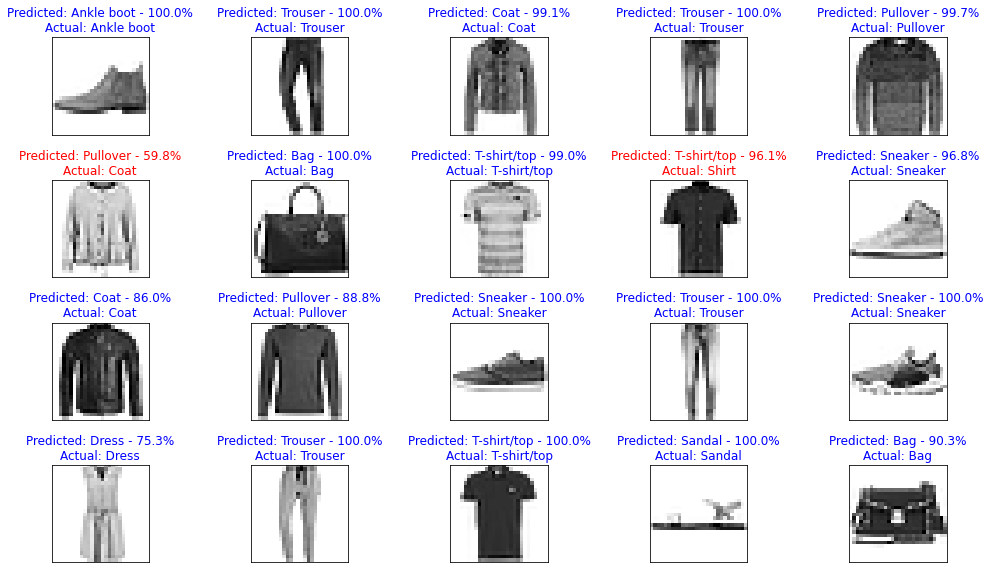

In [ ]:
plt.figure(figsize=(14,10))
for i in range(20):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    i = i * 5

    img = test_images[i].reshape(28,28)
    pred_class = class_names[np.argmax(predictions[i])]
    pred_percentage = np.max(predictions[i])*100
    true_class = class_names[np.argmax(test_labels[i])]
    
    plot_img_label(img, pred_class, pred_percentage, true_class)

plt.tight_layout()
plt.show()

### Results

* <b> Crosstab </b>

In [ ]:
predicted_label = np.argmax(predictions,axis = 1)
true_label = np.argmax(test_labels, axis = 1)

In [ ]:
crosstab = pd.crosstab(true_label, predicted_label, rownames=["True"], colnames=["Predicted"], margins=True)

In [ ]:
classes = {}
for item in zip(range(10), class_names):
  classes[item[0]] = item[1]

In [ ]:
crosstab.rename(columns=classes, index=classes, inplace=True)
crosstab

Predicted,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot,All
True,,,,,,,,,,,
T-shirt/top,886,0,12,9,1,0,87,0,5,0,1000
Trouser,0,990,0,7,1,0,0,0,2,0,1000
Pullover,18,1,802,5,100,0,73,0,1,0,1000
Dress,24,7,5,902,30,0,30,0,1,1,1000
Coat,1,0,21,14,888,0,76,0,0,0,1000
Sandal,0,0,0,0,0,988,0,10,0,2,1000
Shirt,131,0,33,23,53,0,755,0,5,0,1000
Sneaker,0,0,0,0,0,15,0,970,0,15,1000
Bag,5,0,0,2,2,2,6,3,979,1,1000


our best classifcation :
-> trousers and bags with 99%
our lowest classification :
-> shirts with 71 %

* <b> Classification Report </b>

In [ ]:
print(classification_report(true_label, predicted_label, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.80      0.86      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.83      0.89      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.73      0.76      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Conclusion

In this project, it was presented how to train a Convolutional Neural Network to classify images of clothing from the Fashion MNIST dataset using TensorFlow and Keras. Using this model, we got an overall accuracy of 91,22% in our test dataset, which is a good result. However, specifically for our Shirt class we got an accuracy of only 73%. We could try to improve the accuracy of this class using some data augmentation techniques. Furthermore, in case you want to get a model with higher accuracy, you could try changing some hyperparameters or using different network architectures.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db20e7c1-e3b3-4d56-a059-17e8ce061c91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>